# Social Dynamics of a High School

The Somerville High School survey data from 2002 to 2016 is analyzed to determine the social dynamics of the school.  

The following questions will be answered:

* What is the distribution of the number of friends?  
* What is the gender breakdown of friends?  
* What is the breakdown by race?  


## Data gathering and analysis

In [1]:
# Basic setup

# magic function to display the plot in the notebook
%matplotlib inline     

import pandas as pd   # library for manipulating data sets
import matplotlib.pyplot as plt    # library for plotting data

In [2]:
# Read in the data file
path_to_file = 'https://raw.githubusercontent.com/mozilla-outreachy-datascience/outreachy-datascience/master/school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv'
df = pd.read_csv(path_to_file)

In [3]:
# Display the first 5 rows of the data
df.head()

,survey,id,age,gender,grade,race,language,live_us,parents,home,...,chew_age,fr_smok,fr_alc,fr_pot,fr_oth,talk_sex,study_7,read_7,work_7,stren_7
0,SH16,English - SHS,15 years old,Female,Sophomore - 10th,Hispanic or Latino,English,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SH16,2,16 years old,Male,Sophomore - 10th,Hispanic or Latino,English,Between 1-3 years,My mother and a step-parent,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SH16,3,16 years old,Male,Sophomore - 10th,Black,English,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SH16,4,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Spanish,"More than 6 years, but not my whole life",My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SH16,5,18 years old or older,Male,Senior - 12th,Hispanic or Latino,Spanish,I have always lived in the United States,My mother and my father,A house/condo/apartment owned/rented by my par...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display the amount of data in rows and columns
df.shape

(8871, 221)


We don't need all 221 columns for our analysis, so we'll select the columns we'll be most interested in.


In [5]:
# Create a new dataframe with fewer columns
df_f = df.filter(['survey','id','age','gender','race','friends'], axis=1)
df_f.head()

,survey,id,age,gender,race,friends
0,SH16,English - SHS,15 years old,Female,Hispanic or Latino,1 or 2
1,SH16,2,16 years old,Male,Hispanic or Latino,1 or 2
2,SH16,3,16 years old,Male,Black,1 or 2
3,SH16,4,18 years old or older,Male,Hispanic or Latino,5 or more
4,SH16,5,18 years old or older,Male,Hispanic or Latino,None


In [6]:
# Display the amount of data in the friends dataframe
df_f.shape

(8871, 6)

We still have 8,871 rows, but we now only have the 6 columns we are most interested in.

In [7]:
# Check the types of each of the columns
df_f.dtypes

survey     object
id         object
age        object
gender     object
race       object
friends    object
dtype: object

In [8]:
# Check if any of the friends values are null
s_f = df_f['friends']
s_f.isnull().sum()

0

In [9]:
# Find the number of unique answers for number of friends
s_f.nunique()

5

In [10]:
# Find the set of unique values for friends
array_f = s_f.unique()
array_f

array(['1 or 2', '5 or more', 'None', '3 or 4', ' '], dtype=object)

In [11]:
# Replace blank with "No answer"
df_f['friends'] = df_f['friends'].replace([' '], 'No answer')

## Question 1

What is the distribution of the number of friends?

In [12]:
# Arrange data into format to plot
df_fgrp = df_f[['survey','friends']].groupby('friends').count()
df_fgrp.rename(columns={'survey': 'counts'}, inplace=True)
df_fgrp

,counts
friends,
1 or 2,1760
3 or 4,2360
5 or more,2811
No answer,1528
None,412


In [13]:
# Reorder to display better
numforder = ['None', '1 or 2', '3 or 4', '5 or more', 'No answer']
df_fgrp = df_fgrp.reindex(numforder)

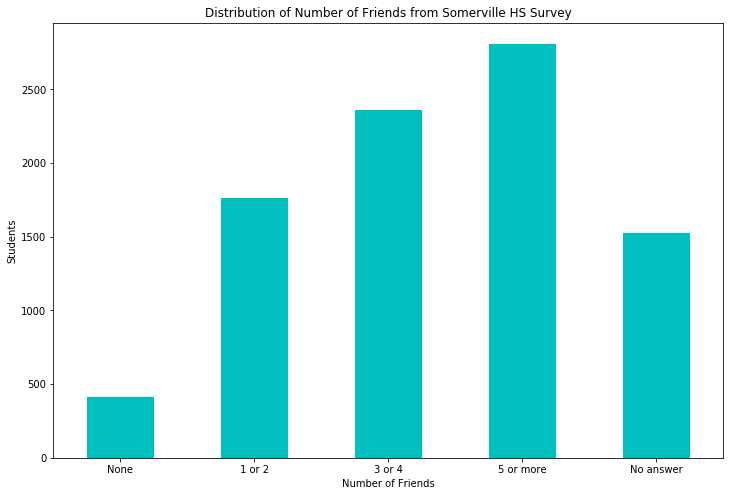

In [14]:
# Draw the plot as a bar graph
df_fgrp.plot(kind='bar', figsize=(12,8), rot=0, color='c')

plt.title('Distribution of Number of Friends from Somerville HS Survey')
plt.xlabel('Number of Friends')
plt.ylabel('Students')
plt.gca().get_legend().remove()

plt.show()

## Question 2

What is the gender breakdown of friends?

In [15]:
# Find if any of the gender values are null
s_g = df_f['gender']
s_g.isnull().sum()

0

In [16]:
# Find the number of unique answers for gender
s_g.nunique()

5

In [17]:
# Find the set of unique values for gender
array_g = s_g.unique()
array_g

array(['Female', 'Male', 'Transgender or Questioning', ' ', '9'],
      dtype=object)

In [18]:
# Replace blank with "No answer"
df_f['gender'] = df_f['gender'].replace([' '], 'No answer')

In [19]:
# Get data frame grouped by friends and gender
df_gen = df_f[['friends', 'gender']].groupby(['friends', 'gender'])['gender'].count().reset_index(name='counts')
df_gen.set_index('friends')

,gender,counts
friends,,
1 or 2,Female,1076
1 or 2,Male,673
1 or 2,No answer,7
1 or 2,Transgender or Questioning,4
3 or 4,Female,1362
3 or 4,Male,970
3 or 4,No answer,25
3 or 4,Transgender or Questioning,3
5 or more,Female,1196


In [20]:
# Rearrange dataframe into format to plot
df_gen = df_gen.pivot(index='friends', columns='gender', values='counts')
df_gen

gender,9,Female,Male,No answer,Transgender or Questioning
friends,,,,,
1 or 2,NaN,1076.0,673.0,7.0,4.0
3 or 4,NaN,1362.0,970.0,25.0,3.0
5 or more,NaN,1196.0,1588.0,20.0,7.0
No answer,7.0,765.0,755.0,1.0,NaN
None,NaN,189.0,219.0,4.0,NaN


In [21]:
# The gender '9' doesn't look like meaningful data, so it will be ignored for this plot
del df_gen['9']
df_gen

gender,Female,Male,No answer,Transgender or Questioning
friends,,,,
1 or 2,1076.0,673.0,7.0,4.0
3 or 4,1362.0,970.0,25.0,3.0
5 or more,1196.0,1588.0,20.0,7.0
No answer,765.0,755.0,1.0,NaN
None,189.0,219.0,4.0,NaN


In [22]:
# Get the types for all columns
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 or 2 to None
Data columns (total 4 columns):
Female                        5 non-null float64
Male                          5 non-null float64
No answer                     5 non-null float64
Transgender or Questioning    3 non-null float64
dtypes: float64(4)
memory usage: 200.0+ bytes


In [23]:
# Clean up the data
columnTitles = ['Female', 'Male', 'Transgender or Questioning', 'No answer']
for i, name in enumerate(columnTitles):
    # Replace NaN with 0
    df_gen.fillna(0, inplace=True)
    # Change type from float to int
    df_gen[name] = df_gen[name].astype(int)

df_gen

gender,Female,Male,No answer,Transgender or Questioning
friends,,,,
1 or 2,1076,673,7,4
3 or 4,1362,970,25,3
5 or more,1196,1588,20,7
No answer,765,755,1,0
None,189,219,4,0


In [24]:
# Change order of indexes and columns for better display
df_gen = df_gen.reindex(numforder, columns=columnTitles)
df_gen

gender,Female,Male,Transgender or Questioning,No answer
friends,,,,
None,189,219,0,4
1 or 2,1076,673,4,7
3 or 4,1362,970,3,25
5 or more,1196,1588,7,20
No answer,765,755,0,1


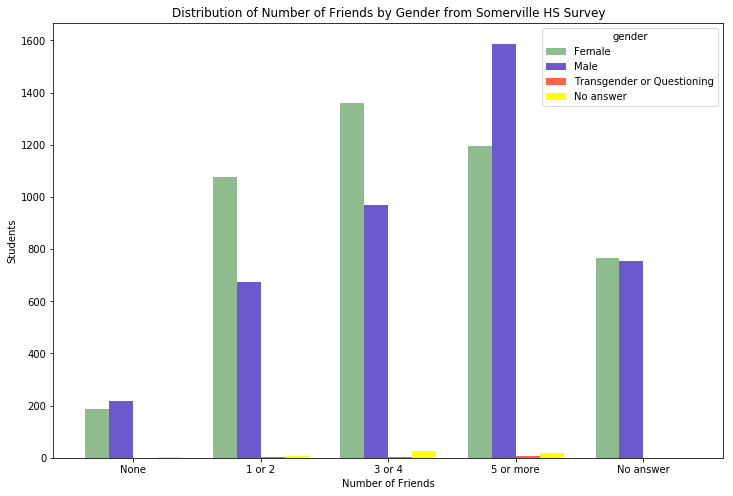

In [25]:
# Draw the plot as a bar graph
my_colors = ['darkseagreen', 'slateblue', 'tomato', 'yellow']
df_gen.plot(kind='bar', figsize=(12,8), rot=0, color=my_colors, width=.75)

plt.title('Distribution of Number of Friends by Gender from Somerville HS Survey')
plt.xlabel('Number of Friends')
plt.ylabel('Students')

plt.show()

## Question 3

What is the breakdown for race?

In [26]:
# Find if any of the race values are null
s_r = df_f['race']
s_r.isnull().sum()

0

In [27]:
# Find the number of unique answers for race
s_r.nunique()

8

In [28]:
# Find the set of unique values for race
array_r = s_r.unique()
array_r

array(['Hispanic or Latino', 'Black', 'White',
       'Asian or other Pacific Islander', 'Other', ' ',
       'American Indian or Alaska Native', '9'], dtype=object)

In [29]:
# Replace blank with "No answer"
df_f['race'] = df_f['race'].replace([' '], 'No answer')

In [30]:
# Get data frame grouped by friends and gender
df_race = df_f[['friends', 'race']].groupby(['friends', 'race'])['race'].count().reset_index(name='counts')
df_race.set_index('friends')

,race,counts
friends,,
1 or 2,American Indian or Alaska Native,11
1 or 2,Asian or other Pacific Islander,176
1 or 2,Black,272
1 or 2,Hispanic or Latino,517
1 or 2,No answer,43
1 or 2,Other,196
1 or 2,White,545
3 or 4,American Indian or Alaska Native,14
3 or 4,Asian or other Pacific Islander,207


In [31]:
# Rearrange dataframe into format to plot
df_race = df_race.pivot(index='friends', columns='race', values='counts')
df_race

race,9,American Indian or Alaska Native,Asian or other Pacific Islander,Black,Hispanic or Latino,No answer,Other,White
friends,,,,,,,,
1 or 2,NaN,11.0,176.0,272.0,517.0,43.0,196.0,545.0
3 or 4,NaN,14.0,207.0,282.0,606.0,77.0,263.0,911.0
5 or more,NaN,15.0,211.0,363.0,687.0,86.0,255.0,1194.0
No answer,23.0,7.0,126.0,252.0,269.0,4.0,158.0,689.0
None,NaN,7.0,45.0,105.0,121.0,10.0,52.0,72.0


In [32]:
# The race '9' doesn't look like meaningful data, so it will be ignored for this plot
del df_race['9']
df_race

race,American Indian or Alaska Native,Asian or other Pacific Islander,Black,Hispanic or Latino,No answer,Other,White
friends,,,,,,,
1 or 2,11.0,176.0,272.0,517.0,43.0,196.0,545.0
3 or 4,14.0,207.0,282.0,606.0,77.0,263.0,911.0
5 or more,15.0,211.0,363.0,687.0,86.0,255.0,1194.0
No answer,7.0,126.0,252.0,269.0,4.0,158.0,689.0
None,7.0,45.0,105.0,121.0,10.0,52.0,72.0


In [33]:
# Get the types for all columns
df_race.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 1 or 2 to None
Data columns (total 7 columns):
American Indian or Alaska Native    5 non-null float64
Asian or other Pacific Islander     5 non-null float64
Black                               5 non-null float64
Hispanic or Latino                  5 non-null float64
No answer                           5 non-null float64
Other                               5 non-null float64
White                               5 non-null float64
dtypes: float64(7)
memory usage: 320.0+ bytes


In [34]:
# Clean up the data
columnTitles = ['Black', 'Hispanic or Latino', 'White', 'Asian or other Pacific Islander','American Indian or Alaska Native', 'Other', 'No answer']
for i, name in enumerate(columnTitles):
    # Replace NaN with 0
    df_race.fillna(0, inplace=True)
    # Change type from float to int
    df_race[name] = df_race[name].astype(int)

df_race

race,American Indian or Alaska Native,Asian or other Pacific Islander,Black,Hispanic or Latino,No answer,Other,White
friends,,,,,,,
1 or 2,11,176,272,517,43,196,545
3 or 4,14,207,282,606,77,263,911
5 or more,15,211,363,687,86,255,1194
No answer,7,126,252,269,4,158,689
None,7,45,105,121,10,52,72


In [35]:
# Change order of indexes and columns for better display
df_race = df_race.reindex(numforder, columns=columnTitles)
df_race

race,Black,Hispanic or Latino,White,Asian or other Pacific Islander,American Indian or Alaska Native,Other,No answer
friends,,,,,,,
None,105,121,72,45,7,52,10
1 or 2,272,517,545,176,11,196,43
3 or 4,282,606,911,207,14,263,77
5 or more,363,687,1194,211,15,255,86
No answer,252,269,689,126,7,158,4


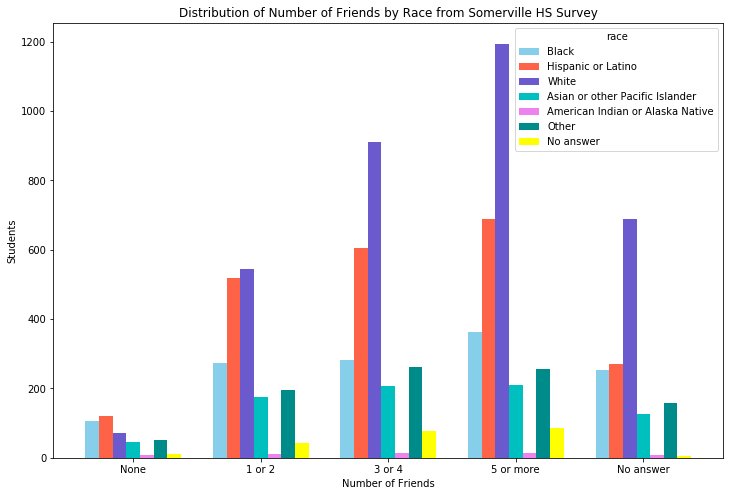

In [36]:
# Draw the plot as a bar graph
my_colors = ['skyblue', 'tomato', 'slateblue', 'c', 'violet', 'darkcyan', 'yellow']

df_race.plot(kind='bar', figsize=(12,8), rot=0, color=my_colors, width=.75)

plt.title('Distribution of Number of Friends by Race from Somerville HS Survey')
plt.xlabel('Number of Friends')
plt.ylabel('Students')

plt.show()